# Feature engineering, outlier detection and removal

In [1]:
import pandas as pd


In [3]:
df = pd.read_csv("Datasets\heights.csv")
df.head()

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1


# percentile method of outlier detection

In [4]:
max_threshold = df['height'].quantile(0.95)
#a function to calculate percentile, it will give threshold for the given argument
print(max_threshold)

#this gives the 

7.4799999999999995


In [6]:
df[df['height']>=max_threshold]

,name,height
11,ramesh,8.0


In [7]:
min_thres = df['height'].quantile(0.05)
min_thres

3.6050000000000004

In [8]:
df[df['height']<min_thres]

,name,height
7,anil,1.2


# removing outliers

In [10]:
df[(df['height'] < max_threshold) &  (df['height']>min_thres)]

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1
5,amit,6.4
6,amita,6.5
8,sudha,6.0
9,ram,5.1
10,kamal,5.6


# Outlier detection with dataset

In [11]:
df = pd.read_csv("Datasets\Bengaluru_House_data.csv")

In [12]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [13]:
df.shape

(13320, 9)

In [14]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [15]:
df = df.drop('area_type', axis = 1)
df.shape

(13320, 8)

In [16]:
df.dtypes

availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  13320 non-null  object 
 1   location      13319 non-null  object 
 2   size          13304 non-null  object 
 3   society       7818 non-null   object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [18]:
min_thres, max_thres = df['price'].quantile([0.001, 0.999])

min_thres, max_thres

(11.159500000000001, 2000.0)

In [20]:
df[df['price']<min_thres]

,availability,location,size,society,total_sqft,bath,balcony,price
171,Ready To Move,Attibele,1 BHK,Jae 1hu,450,1.0,1.0,11.00
942,Ready To Move,Attibele,1 BHK,Jae 2hu,400,1.0,1.0,11.00
1471,18-Mar,Kengeri,1 BHK,NaN,340,1.0,1.0,10.00
2437,Ready To Move,Attibele,1 BHK,Jae 1hu,395,1.0,1.0,10.25
4113,18-Jan,BTM Layout,3 BHK,NaN,167Sq. Meter,3.0,2.0,10.00
5410,Ready To Move,Attibele,1 BHK,Jae 1hu,400,1.0,1.0,10.00
7482,Ready To Move,Alur,1 BHK,NaN,470,2.0,1.0,10.00
8594,Ready To Move,Chandapura,1 BHK,NaN,450,1.0,1.0,9.00
8653,Ready To Move,Doddaballapur,2 Bedroom,NaN,640,1.0,0.0,10.50
10526,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00


In [22]:
df[df['price']>max_thres]

,availability,location,size,society,total_sqft,bath,balcony,price
408,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0
605,19-Jan,Malleshwaram,7 BHK,NaN,12000,7.0,3.0,2200.0
2623,18-Jul,Dodsworth Layout,4 Bedroom,NaN,30000,4.0,NaN,2100.0
3180,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.0
4162,Ready To Move,Yemlur,4 Bedroom,Epllan,7000,5.0,NaN,2050.0
6421,18-Sep,Bommenahalli,4 Bedroom,Prood G,2940,3.0,2.0,2250.0
10304,Ready To Move,5th Block Jayanagar,4 Bedroom,NaN,10624,4.0,2.0,2340.0
11080,18-Jan,Ashok Nagar,4 BHK,NaN,8321,5.0,2.0,2912.0
11763,Ready To Move,Sadashiva Nagar,5 Bedroom,NaN,9600,7.0,2.0,2736.0
12443,Ready To Move,Dollars Colony,4 Bedroom,NaN,4350,8.0,NaN,2600.0


## remove the outliers

In [25]:
df_new = df[(df['price']<max_thres) & (df['price']>min_thres)]

In [26]:
df_new.shape

(13291, 8)

In [27]:
df_new.describe()

,bath,balcony,price
count,13219.000000,12688.000000,13291.000000
mean,2.690673,1.584253,110.010361
std,1.335757,0.817169,125.434347
min,1.000000,0.000000,11.500000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,1950.000000



# Removing Outliers using Z-Score

In [28]:
import seaborn as sns

In [29]:
rel = df_new.corr()

<AxesSubplot:>

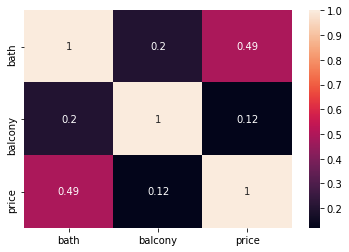

In [30]:
sns.heatmap(rel, annot=True)

# detection usign Z-Score

Z-score is based on standard deviation

formula 
Z = (x - u)/sigma

x - original datapoint
u - mean of the datapoints
sigma - standard deviation



In [35]:
df_heights = pd.read_csv('Datasets\heights.csv')

df_heights['Z-score'] = (df_heights['height'] - df_heights['height'].mean())/df_heights['height'].std()

In [36]:
df_heights

,name,height,Z-score
0,mohit,5.3,-0.238392
1,sakshi,5.2,-0.301363
2,arun,5.1,-0.364335
3,varun,4.9,-0.490278
4,ani,7.1,0.895094
5,amit,6.4,0.454294
6,amita,6.5,0.517265
7,anil,1.2,-2.820220
8,sudha,6.0,0.202408
9,ram,5.1,-0.364335
